In [2]:
import numpy as np
import matplotlib.pyplot as plt
import h5py

from scipy.signal import butter, sosfilt
from scipy.fft import rfft, irfft, rfftfreq

In [3]:
def bandpass_filtered(data, fs, f_low=10000, f_high=100000, order=3): 
    sos_bp = butter(order, [f_low, f_high], 'bandpass', fs=fs, output='sos')
    filtered = sosfilt(sos_bp, data)
    return filtered

In [30]:
file_name = r"E:\dm_data\20241119_2e-7mbar\20241119_abcd_2e-7mbar_36.hdf5"
f = h5py.File(file_name, 'r')

In [31]:
print(np.mean(f['data']['channel_a'] * f['data']['channel_a'].attrs['adc2mv']))
print(np.mean(f['data']['channel_b'] * f['data']['channel_b'].attrs['adc2mv']))
print(np.mean(f['data']['channel_c'] * f['data']['channel_c'].attrs['adc2mv']))
print(np.max(f['data']['channel_d'] * f['data']['channel_d'].attrs['adc2mv']))
# print(np.mean(f['data']['channel_e'] * f['data']['channel_e'].attrs['adc2mv']))
# print(np.mean(f['data']['channel_f'] * f['data']['channel_f'].attrs['adc2mv']))
# print(np.min(f['data']['channel_g'] * f['data']['channel_g'].attrs['adc2mv']))
# print(np.mean(f['data']['channel_h'] * f['data']['channel_h'].attrs['adc2mv']))

# print(np.mean(f['data']['channel_e'] * f['data']['channel_e'].attrs['adc2mv']))


-1481.887801843316
356.67219075594323
-586.9499219845151
478.9574877162999


In [32]:
f.close()
# del aa, bb, cc, dd, ee, ff, gg

In [22]:
timestamp = f['data'].attrs['timestamp']
dt = f['data'].attrs['delta_t']
fs = int(np.ceil(1 / dt))

# aa = f['data']['channel_a'] * f['data']['channel_a'].attrs['adc2mv']
# bb = f['data']['channel_b'] * f['data']['channel_b'].attrs['adc2mv']
# cc = f['data']['channel_c'] * f['data']['channel_c'].attrs['adc2mv']
dd = f['data']['channel_d'] * f['data']['channel_d'].attrs['adc2mv']
# ee = f['data']['channel_e'] * f['data']['channel_e'].attrs['adc2mv']
# ff = f['data']['channel_f'] * f['data']['channel_f'].attrs['adc2mv']
gg = f['data']['channel_g'] * f['data']['channel_g'].attrs['adc2mv']
# zz_bp = bandpass_filtered(dd, fs, 30000, 100000)


Text(0.5, 0, 'Idx')

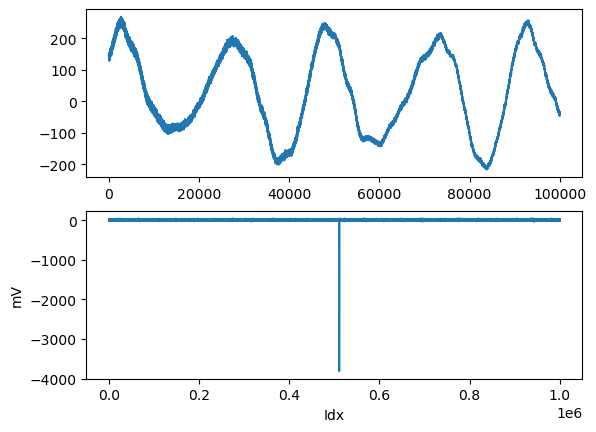

In [23]:
fig, axes = plt.subplots(2, 1)

# axes[0].plot(aa)
# axes[0].plot(bb)
# axes[0].plot(cc)
axes[0].plot(dd[:100000])

# axes[1].plot(ee)
# axes[1].plot(ff)
axes[1].plot(gg[:1000000])

plt.ylabel('mV')
plt.xlabel('Idx')

In [24]:
del dd, gg